# โหลดรูปภาพจาก google

## ติดตั้งไลบรารี่ google_images_download

In [1]:
! pip install google_images_download

     |████████████████████████████████| 911kB 6.9MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=81b1e834b67a6fa57bacb313f9105c8ee2b42c684357a25928e57ee500454e17
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


## โหลดรูปภาพจาก google
ตัวอย่างโหลดรูปภาพสุนัข (Dog)

In [2]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"dog","limit":5,"print_urls":True}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images




Item no.: 1 --> Item name = dog
Evaluating...
Starting Download...
Image URL: https://upload.wikimedia.org/wikipedia/commons/d/d9/Collage_of_Nine_Dogs.jpg
Completed Image ====> 1.Collage_of_Nine_Dogs.jpg
Image URL: https://vetstreet.brightspotcdn.com/dims4/default/54186d0/2147483647/thumbnail/590x420/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F40%2F58%2F3bc5c01c4cdb8a0581681831faa9%2Fgreat-dane-shaking-paw-thinkstockphotos-522650067-590.jpg
Invalid or missing image format. Skipping...
Image URL: https://www.petmd.com/sites/default/files/Acute-Dog-Diarrhea-47066074.jpg
Completed Image ====> 2.Acute-Dog-Diarrhea-47066074.jpg
Image URL: https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/09/dog-landing-hero-lg.jpg?bust=1536935129&width=1080
Completed Image ====> 3.dog-landing-hero-lg.jpg
Image URL: https://www.medicalnewstoday.com/content//images/articles/322/322868/golden-retriever-puppy.jpg
Completed Image ====> 4.golden-retriever-puppy.jpg
Image URL: htt

ตรวจสอบรูปภาพที่ดาวน์โหลด

In [3]:
!ls '/content/downloads/dog'

1.Collage_of_Nine_Dogs.jpg	   4.golden-retriever-puppy.jpg
2.Acute-Dog-Diarrhea-47066074.jpg  5.gettyimages-1094874726.png
3.dog-landing-hero-lg.jpg


# อ่านรูปภาพจากไดเร็กทรอรี่ (Directory)

In [16]:
import os

img_path = '/content/downloads/dog'

files = []
for r, d, f in os.walk(img_path):
    for file in f:
        if (('.png' in file) or ('.jpg' in file)) :
            files.append(os.path.join(r, file))

for f in files:
    print(f)

/content/downloads/dog/4.golden-retriever-puppy.jpg
/content/downloads/dog/3.dog-landing-hero-lg.jpg
/content/downloads/dog/5.gettyimages-1094874726.png
/content/downloads/dog/1.Collage_of_Nine_Dogs.jpg
/content/downloads/dog/2.Acute-Dog-Diarrhea-47066074.jpg


# ฟังก์ชันแสดงรูปภาพ

ตัวอย่างฟังก์ชันแสดงรูปภาพ

In [0]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import transform

def show_image(image_files, fig_row, fig_col):
  try:
    plt.figure(figsize=(8,8))
    for i in range(0, (fig_row * fig_col)):
      plt.subplot(fig_row, fig_col, i+1)

      show_img = io.imread(image_files[i])
      show_img = transform.resize(show_img,(150,150), anti_aliasing=True)
      plt.axis('off')
      plt.imshow(show_img)
    plt.show()
  except:
    pass  

แสดงรูปภาพ

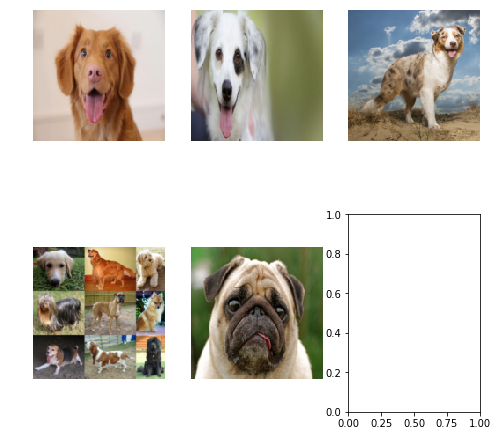

In [6]:
import numpy as np

n_rows = int(np.sqrt(len(files)))
n_cols = int(np.sqrt(len(files)))
show_image(files, n_rows, n_cols+1)

## ฟังก์ชันแปลงรูปภาพเป็นภาพสีเทา (Gray image) และแสดงรูปภาพ

In [0]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import transform

def show_gray_image(image_files, fig_row, fig_col):
  try:
    plt.figure(figsize=(8,8))
    for i in range(0, (fig_row * fig_col)):
      plt.subplot(fig_row, fig_col, i+1)

      img = io.imread(image_files[i])
      re_img = transform.resize(img,(150,150), anti_aliasing=True)
      gray_img = color.rgb2gray(re_img)
      
      plt.axis('off')
      plt.gray()
      plt.imshow(gray_img)
    plt.show()
  except:
    pass 

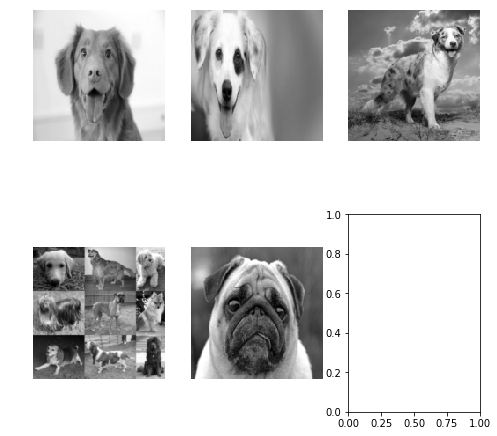

In [8]:
import numpy as np

n_rows = int(np.sqrt(len(files)))
n_cols = int(np.sqrt(len(files)))
show_gray_image(files, n_rows, n_cols+1)

## ฟังก์ชันแปลงรูปภาพเป็นภาพสีขาวดำ (Binary image) โดยใช้ Global Threshold และแสดงรูปภาพ 

In [0]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import transform
from skimage import filters

def show_binary_image(image_files, fig_row, fig_col, inv=False):
  try:
    plt.figure(figsize=(8,8))
    for i in range(0, (fig_row * fig_col)):
      plt.subplot(fig_row, fig_col, i+1)

      img = io.imread(image_files[i])
      re_img = transform.resize(img,(150,150), anti_aliasing=True)
      gray_img = color.rgb2gray(re_img)
      thresh = filters.threshold_otsu(gray_img)
      if(inv == False):
        binary_img = gray_img > thresh
      else:
        binary_img = gray_img < thresh
      
      plt.axis('off')
      plt.imshow(binary_img)
    plt.show()
  except:
    pass 

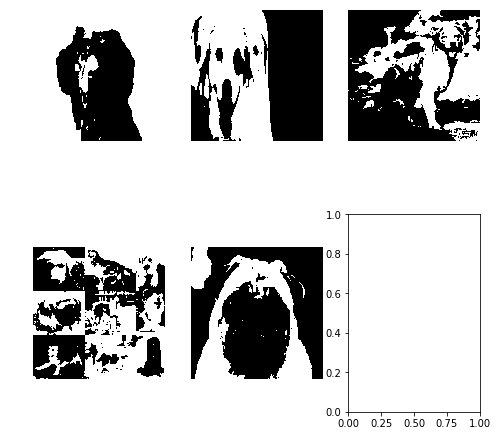

In [10]:
import numpy as np

n_rows = int(np.sqrt(len(files)))
n_cols = int(np.sqrt(len(files)))
show_binary_image(files, n_rows, n_cols+1)

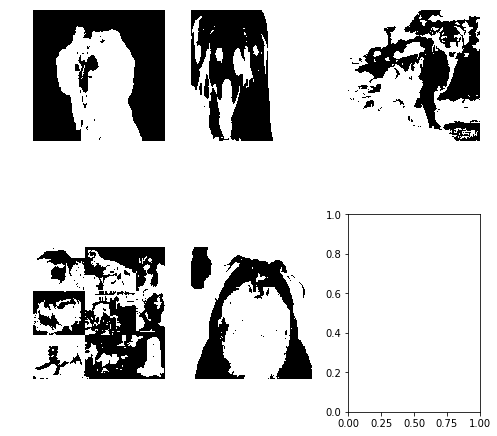

In [11]:
import numpy as np

n_rows = int(np.sqrt(len(files)))
n_cols = int(np.sqrt(len(files)))
show_binary_image(files, n_rows, n_cols+1, inv=True)

## ฟังก์ชันแปลงรูปภาพเป็นภาพสีขาวดำ (Binary image) โดยใช้ Adaptive Threshold และแสดงรูปภาพ 

https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_niblack_sauvola.html

In [0]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import transform
from skimage import filters

def show_binary_image(image_files, fig_row, fig_col, window_size = 25, adap_type='sauvola'):
  try:
    plt.figure(figsize=(8,8))
    for i in range(0, (fig_row * fig_col)):
      plt.subplot(fig_row, fig_col, i+1)

      img = io.imread(image_files[i])
      re_img = transform.resize(img,(150,150), anti_aliasing=True)
      gray_img = color.rgb2gray(re_img)
      
      if(adap_type == 'sauvola'):
        thresh_sauvola = filters.threshold_sauvola(gray_img, window_size=window_size)
        binary_adaptive_img = gray_img > thresh_sauvola
      elif(adap_type == 'niblack'):
        thresh_niblack = filters.threshold_niblack(gray_img, window_size=window_size, k=0.8)
        binary_adaptive_img = gray_img > thresh_niblack
      else:
        print('adap_type = sauvola or niblack')
        pass
      
      plt.axis('off')
      plt.imshow(binary_adaptive_img)
    plt.show()
  except:
    pass 

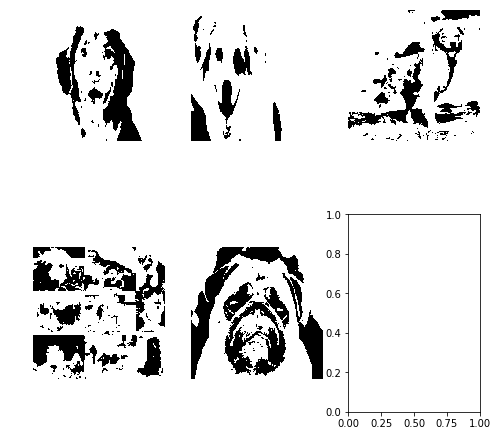

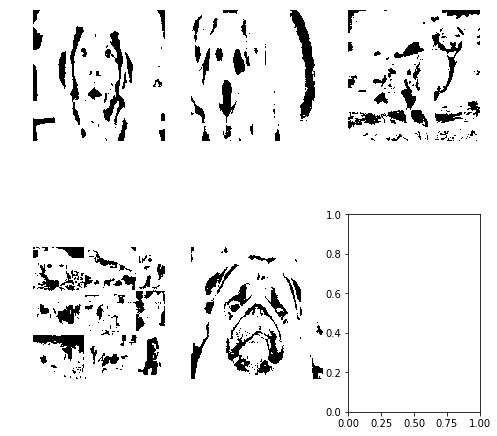

In [70]:
import numpy as np

n_rows = int(np.sqrt(len(files)))
n_cols = int(np.sqrt(len(files)))
show_binary_image(files, n_rows, n_cols+1, window_size=51, adap_type='sauvola')
show_binary_image(files, n_rows, n_cols+1, window_size=41, adap_type='niblack')